In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from category_encoders import BinaryEncoder, TargetEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

In [6]:
data = pd.read_csv('data.csv')

In [7]:
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,5,4,3,4,4,5,25,18.0,False
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,1,5,3,1,1,1,6.0,False
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,5,4,3,4,4,5,0,0.0,True
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,2,5,3,1,2,11,9.0,False
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,5,3,3,4,4,3,3,0,0.0,True


In [8]:
X = data.drop(columns='satisfaction')
y = data['satisfaction']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [10]:
X_y_train = X_train.copy(deep=True)
X_y_train['y'] = y_train

Анализ данных

In [11]:
X_y_train.isna().any()

Gender                               False
Customer Type                        False
Age                                  False
Type of Travel                       False
Class                                False
Flight Distance                      False
Inflight wifi service                False
Departure/Arrival time convenient    False
Ease of Online booking               False
Gate location                        False
Food and drink                       False
Online boarding                      False
Seat comfort                         False
Inflight entertainment               False
On-board service                     False
Leg room service                     False
Baggage handling                     False
Checkin service                      False
Cleanliness                          False
Departure Delay in Minutes           False
Arrival Delay in Minutes              True
y                                    False
dtype: bool

<Axes: xlabel='Arrival Delay in Minutes', ylabel='Count'>

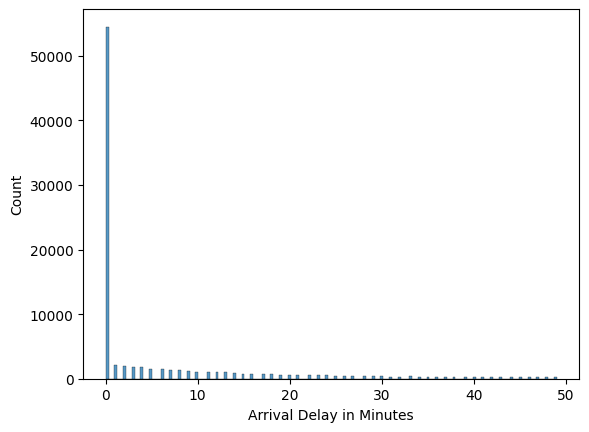

In [13]:
sns.histplot(X_y_train['Arrival Delay in Minutes'][X_y_train['Arrival Delay in Minutes'] < 50])

In [14]:
X_y_train['Arrival Delay in Minutes'] = X_y_train['Arrival Delay in Minutes'].fillna(0)

In [15]:
X_y_train.isna().any()

Gender                               False
Customer Type                        False
Age                                  False
Type of Travel                       False
Class                                False
Flight Distance                      False
Inflight wifi service                False
Departure/Arrival time convenient    False
Ease of Online booking               False
Gate location                        False
Food and drink                       False
Online boarding                      False
Seat comfort                         False
Inflight entertainment               False
On-board service                     False
Leg room service                     False
Baggage handling                     False
Checkin service                      False
Cleanliness                          False
Departure Delay in Minutes           False
Arrival Delay in Minutes             False
y                                    False
dtype: bool

In [39]:
num_fac = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

In [40]:
cat_fac= ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
                       'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness']

In [41]:
useful_num_fac = ['Age', 'Flight Distance']
useful_cat_fac = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 'Departure/Arrival time convenient',   'Online boarding','Inflight entertainment', 'On-board service', 'Leg room service', 'Checkin service']

In [42]:
X_y_train_useful_factors = X_y_train[useful_cat_fac + useful_num_fac + ['y']]

In [43]:
X_y_train_useful_factors

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Online boarding,Inflight entertainment,On-board service,Leg room service,Checkin service,Age,Flight Distance,y
2049,Male,Loyal Customer,Business travel,Eco,3,2,3,3,3,2,3,41,187,False
49176,Male,disloyal Customer,Business travel,Eco,1,1,1,4,1,1,2,14,1310,False
38346,Female,Loyal Customer,Business travel,Business,5,5,5,4,4,4,4,43,925,True
36699,Male,Loyal Customer,Business travel,Eco,3,4,3,3,3,3,1,50,925,False
20521,Female,Loyal Customer,Personal Travel,Eco,3,2,2,3,3,3,1,55,460,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45891,Male,Loyal Customer,Business travel,Business,3,5,5,5,5,5,2,50,1428,True
117952,Male,Loyal Customer,Business travel,Business,3,3,5,5,5,2,4,19,946,True
42613,Male,Loyal Customer,Personal Travel,Eco,5,5,5,3,4,5,3,19,493,True
43567,Female,Loyal Customer,Personal Travel,Eco,2,5,5,5,5,2,4,69,925,False


In [44]:
gender_encoder = BinaryEncoder()
gender_encoder.fit(X_y_train_useful_factors['Gender'])

BinaryEncoder(cols=['Gender'],
              mapping=[{'col': 'Gender',
                        'mapping':     Gender_0  Gender_1
 1         0         1
 2         1         0
-1         0         0
-2         0         0}])

In [45]:
gender_encoder.transform(X_y_train_useful_factors['Gender'])

,Gender_0,Gender_1
2049,0,1
49176,0,1
38346,1,0
36699,0,1
20521,1,0
...,...,...
45891,0,1
117952,0,1
42613,0,1
43567,1,0


In [46]:
gender_type_of_travel_encoder = BinaryEncoder()
gender_type_of_travel_encoder.fit(X_y_train_useful_factors[['Gender', 'Type of Travel']])

BinaryEncoder(cols=['Gender', 'Type of Travel'],
              mapping=[{'col': 'Gender',
                        'mapping':     Gender_0  Gender_1
 1         0         1
 2         1         0
-1         0         0
-2         0         0},
                       {'col': 'Type of Travel',
                        'mapping':     Type of Travel_0  Type of Travel_1
 1                 0                 1
 2                 1                 0
-1                 0                 0
-2                 0                 0}])

In [47]:
gender_type_of_travel_encoded = gender_type_of_travel_encoder\
    .transform(X_y_train_useful_factors[['Gender', 'Type of Travel']])

for col in gender_type_of_travel_encoded:
    X_y_train_useful_factors[col] = gender_type_of_travel_encoded[col]
    
X_y_train_useful_factors = X_y_train_useful_factors.drop(columns=['Gender', 'Type of Travel'])

C:\Users\Arthu\AppData\Local\Temp\ipykernel_14436\1832978997.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_y_train_useful_factors[col] = gender_type_of_travel_encoded[col]
C:\Users\Arthu\AppData\Local\Temp\ipykernel_14436\1832978997.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_y_train_useful_factors[col] = gender_type_of_travel_encoded[col]
C:\Users\Arthu\AppData\Local\Temp\ipykernel_14436\1832978997.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [49]:
X_y_train_useful_factors

,Customer Type,Class,Inflight wifi service,Departure/Arrival time convenient,Online boarding,Inflight entertainment,On-board service,Leg room service,Checkin service,Age,Flight Distance,y,Gender_0,Gender_1,Type of Travel_0,Type of Travel_1
2049,Loyal Customer,Eco,3,2,3,3,3,2,3,41,187,False,0,1,0,1
49176,disloyal Customer,Eco,1,1,1,4,1,1,2,14,1310,False,0,1,0,1
38346,Loyal Customer,Business,5,5,5,4,4,4,4,43,925,True,1,0,0,1
36699,Loyal Customer,Eco,3,4,3,3,3,3,1,50,925,False,0,1,0,1
20521,Loyal Customer,Eco,3,2,2,3,3,3,1,55,460,False,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45891,Loyal Customer,Business,3,5,5,5,5,5,2,50,1428,True,0,1,0,1
117952,Loyal Customer,Business,3,3,5,5,5,2,4,19,946,True,0,1,0,1
42613,Loyal Customer,Eco,5,5,5,3,4,5,3,19,493,True,0,1,1,0
43567,Loyal Customer,Eco,2,5,5,5,5,2,4,69,925,False,1,0,1,0


In [51]:
target_encoded_categories = [x for x in useful_cat_fac if x not in ['Gender', 'Type of Travel']]

In [52]:
for col in target_encoded_categories:
    X_y_train_useful_factors[col] = X_y_train_useful_factors[col].astype('category')

In [53]:
X_y_train_useful_factors.dtypes

Customer Type                        category
Class                                category
Inflight wifi service                category
Departure/Arrival time convenient    category
Online boarding                      category
Inflight entertainment               category
On-board service                     category
Leg room service                     category
Checkin service                      category
Age                                     int64
Flight Distance                         int64
y                                        bool
Gender_0                                int64
Gender_1                                int64
Type of Travel_0                        int64
Type of Travel_1                        int64
dtype: object

In [54]:
target_encoder = TargetEncoder()
target_encoder.fit(X_y_train_useful_factors[target_encoded_categories], y=X_y_train_useful_factors['y'])

TargetEncoder(cols=['Customer Type', 'Class', 'Inflight wifi service',
                    'Departure/Arrival time convenient', 'Online boarding',
                    'Inflight entertainment', 'On-board service',
                    'Leg room service', 'Checkin service'])

In [55]:
target_encoder.transform(X_y_train_useful_factors[target_encoded_categories])

,Customer Type,Class,Inflight wifi service,Departure/Arrival time convenient,Online boarding,Inflight entertainment,On-board service,Leg room service,Checkin service
2049,0.478736,0.188327,0.251605,0.443421,0.137674,0.273650,0.316771,0.278303,0.448453
49176,0.240164,0.188327,0.329143,0.492300,0.137533,0.610346,0.196860,0.205081,0.250846
38346,0.478736,0.694691,0.990207,0.424992,0.872366,0.610346,0.536111,0.580755,0.460151
36699,0.478736,0.188327,0.251605,0.388344,0.137674,0.273650,0.316771,0.276713,0.242364
20521,0.478736,0.188327,0.251605,0.443421,0.113367,0.273650,0.316771,0.276713,0.242364
...,...,...,...,...,...,...,...,...,...
45891,0.478736,0.694691,0.251605,0.424992,0.872366,0.650755,0.648188,0.616631,0.250846
117952,0.478736,0.694691,0.251605,0.441579,0.872366,0.650755,0.648188,0.278303,0.460151
42613,0.478736,0.188327,0.990207,0.424992,0.872366,0.273650,0.536111,0.616631,0.448453
43567,0.478736,0.188327,0.246941,0.424992,0.872366,0.650755,0.648188,0.278303,0.460151


In [57]:
categorical_factors_encoded = target_encoder\
    .transform(X_y_train_useful_factors[target_encoded_categories])

for col in categorical_factors_encoded:
    X_y_train_useful_factors[col] = categorical_factors_encoded[col]

In [58]:
X_y_train_useful_factors

,Customer Type,Class,Inflight wifi service,Departure/Arrival time convenient,Online boarding,Inflight entertainment,On-board service,Leg room service,Checkin service,Age,Flight Distance,y,Gender_0,Gender_1,Type of Travel_0,Type of Travel_1
2049,0.478736,0.188327,0.251605,0.443421,0.137674,0.273650,0.316771,0.278303,0.448453,41,187,False,0,1,0,1
49176,0.240164,0.188327,0.329143,0.492300,0.137533,0.610346,0.196860,0.205081,0.250846,14,1310,False,0,1,0,1
38346,0.478736,0.694691,0.990207,0.424992,0.872366,0.610346,0.536111,0.580755,0.460151,43,925,True,1,0,0,1
36699,0.478736,0.188327,0.251605,0.388344,0.137674,0.273650,0.316771,0.276713,0.242364,50,925,False,0,1,0,1
20521,0.478736,0.188327,0.251605,0.443421,0.113367,0.273650,0.316771,0.276713,0.242364,55,460,False,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45891,0.478736,0.694691,0.251605,0.424992,0.872366,0.650755,0.648188,0.616631,0.250846,50,1428,True,0,1,0,1
117952,0.478736,0.694691,0.251605,0.441579,0.872366,0.650755,0.648188,0.278303,0.460151,19,946,True,0,1,0,1
42613,0.478736,0.188327,0.990207,0.424992,0.872366,0.273650,0.536111,0.616631,0.448453,19,493,True,0,1,1,0
43567,0.478736,0.188327,0.246941,0.424992,0.872366,0.650755,0.648188,0.278303,0.460151,69,925,False,1,0,1,0


In [63]:
scaler = StandardScaler()
scaler.fit(X_y_train_useful_factors.drop(columns='y'))

StandardScaler()

In [64]:
X_y_train_useful_factors[X_y_train_useful_factors.drop(columns='y').columns] = \
    scaler.transform(X_y_train_useful_factors.drop(columns='y'))

In [65]:
X_y_train_useful_factors

,Customer Type,Class,Inflight wifi service,Departure/Arrival time convenient,Online boarding,Inflight entertainment,On-board service,Leg room service,Checkin service,Age,Flight Distance,y,Gender_0,Gender_1,Type of Travel_0,Type of Travel_1
2049,0.473129,-0.991014,-0.703202,0.240835,-0.969222,-0.776461,-0.715252,-0.928639,0.107145,0.103861,-1.005799,False,-1.016020,1.016020,-0.669201,0.669201
49176,-2.113587,-0.991014,-0.406052,1.655446,-0.969682,0.842415,-1.439955,-1.362309,-1.478325,-1.680678,0.120675,False,-1.016020,1.016020,-0.669201,0.669201
38346,0.473129,1.042498,2.127330,-0.292515,1.424925,0.842415,0.610374,0.862665,0.200998,0.236049,-0.265516,True,0.984233,-0.984233,-0.669201,0.669201
36699,0.473129,-0.991014,-0.703202,-1.353132,-0.969222,-0.776461,-0.715252,-0.938060,-1.546384,0.698707,-0.265516,False,-1.016020,1.016020,-0.669201,0.669201
20521,0.473129,-0.991014,-0.703202,0.240835,-1.048430,-0.776461,-0.715252,-0.938060,-1.546384,1.029177,-0.731955,False,0.984233,-0.984233,1.494319,-1.494319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45891,0.473129,1.042498,-0.703202,-0.292515,1.424925,1.036710,1.287738,1.075145,-1.478325,0.698707,0.239040,True,-1.016020,1.016020,-0.669201,0.669201
117952,0.473129,1.042498,-0.703202,0.187523,1.424925,1.036710,1.287738,-0.928639,0.200998,-1.350208,-0.244451,True,-1.016020,1.016020,-0.669201,0.669201
42613,0.473129,-0.991014,2.127330,-0.292515,1.424925,-0.776461,0.610374,1.075145,0.107145,-1.350208,-0.698853,True,-1.016020,1.016020,1.494319,-1.494319
43567,0.473129,-0.991014,-0.721076,-0.292515,1.424925,1.036710,1.287738,-0.928639,0.200998,1.954494,-0.265516,False,0.984233,-0.984233,1.494319,-1.494319


In [66]:
X_train = X_y_train_useful_factors.drop(columns='y')

In [67]:
scaler.transform(X_y_train_useful_factors.drop(columns='y'))[:, 2]

array([-4.36228951, -3.22352969,  6.48510796, ...,  6.48510796,
       -4.43078925, -4.36228951])

In [68]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)

In [71]:
model = LogisticRegression(penalty=None)

In [72]:
model.fit(X_train, y_train)

LogisticRegression(penalty=None)

In [73]:
model.predict(X_train)

array([ True, False, False, ...,  True,  True,  True])

In [74]:
model.predict_proba(X_train)

array([[0.01437079, 0.98562921],
       [0.99531261, 0.00468739],
       [0.99530244, 0.00469756],
       ...,
       [0.03430767, 0.96569233],
       [0.00785867, 0.99214133],
       [0.18191044, 0.81808956]])

In [75]:
model.predict_proba(X_train)[:, 1] >= 0.5

array([ True, False, False, ...,  True,  True,  True])

In [76]:
pred_arr = model.predict_proba(X_train)[:, 1] >= 0.5

In [77]:
pred_arr == model.predict(X_train)

array([ True,  True,  True, ...,  True,  True,  True])

In [78]:
(pred_arr == model.predict(X_train)).sum()

73057

In [79]:
(pred_arr == model.predict(X_train)).sum() == len(pred_arr)

True

In [80]:
# accuracy
model.score(X_train, y_train)

0.9225946863408024

In [81]:
accuracy_score(y_train, model.predict(X_train))

0.9225946863408024

In [82]:
precision_score(y_train, model.predict(X_train))

0.9133156297420334

In [83]:
recall_score(y_train, model.predict(X_train))

0.9084048674653334

In [84]:
f1_score(y_train, model.predict(X_train))

0.9108536296996926

In [85]:
f1_score(y_val, model.predict(X_val))

0.9094015471501116

In [92]:
X_test_useful_factors = X_test[useful_cat_fac + useful_num_fac]

In [93]:
gender_type_of_travel_encoded = gender_type_of_travel_encoder\
    .transform(X_test_useful_factors[['Gender', 'Type of Travel']])

for col in gender_type_of_travel_encoded:
    X_test_useful_factors[col] = gender_type_of_travel_encoded[col]
    
X_test_useful_factors = X_test_useful_factors.drop(columns=['Gender', 'Type of Travel'])

C:\Users\Arthu\AppData\Local\Temp\ipykernel_14436\4218811966.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_useful_factors[col] = gender_type_of_travel_encoded[col]
C:\Users\Arthu\AppData\Local\Temp\ipykernel_14436\4218811966.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_useful_factors[col] = gender_type_of_travel_encoded[col]
C:\Users\Arthu\AppData\Local\Temp\ipykernel_14436\4218811966.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [94]:
categorical_factors_encoded = target_encoder\
    .transform(X_test_useful_factors[target_encoded_categories])

for col in categorical_factors_encoded:
    X_test_useful_factors[col] = categorical_factors_encoded[col]

In [95]:
X_test_useful_factors[X_test_useful_factors.columns] = scaler.transform(X_test_useful_factors)

In [96]:
X_test_useful_factors

,Customer Type,Class,Inflight wifi service,Departure/Arrival time convenient,Online boarding,Inflight entertainment,On-board service,Leg room service,Checkin service,Age,Flight Distance,Gender_0,Gender_1,Type of Travel_0,Type of Travel_1
125669,0.473129,-0.991014,-0.703202,0.240835,-0.969222,-1.055199,-1.075463,-0.938060,0.107145,-1.878960,-1.137205,-1.016020,1.016020,1.494319,-1.494319
90648,0.473129,1.042498,-0.703202,0.187523,0.615762,0.842415,0.610374,0.862665,0.200998,0.632613,1.488894,-1.016020,1.016020,-0.669201,0.669201
45322,0.473129,-0.991014,0.634131,0.187523,0.615762,0.842415,-0.715252,1.075145,0.200998,0.830895,0.609181,-1.016020,1.016020,-0.669201,0.669201
64084,0.473129,1.042498,2.127330,-0.292515,-1.048430,-1.407441,0.610374,-1.362309,-1.546384,-0.755362,-0.511274,-1.016020,1.016020,-0.669201,0.669201
71595,0.473129,-0.991014,0.634131,0.240835,-0.969682,0.842415,0.610374,-1.362309,-1.546384,0.963083,-0.859348,0.984233,-0.984233,1.494319,-1.494319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127886,0.473129,1.042498,0.634131,-1.353132,-0.969682,0.842415,0.610374,0.862665,-1.478325,0.566519,2.643455,0.984233,-0.984233,-0.669201,0.669201
37272,0.473129,1.042498,-0.721076,0.240835,1.424925,1.036710,1.287738,1.075145,1.449067,0.896989,0.504860,-1.016020,1.016020,-0.669201,0.669201
36325,0.473129,-0.991014,2.127330,0.187523,1.424925,1.036710,-0.715252,0.862665,-1.478325,-0.557080,-0.884425,-1.016020,1.016020,1.494319,-1.494319
75258,-2.113587,1.042498,-0.406052,1.655446,-0.969682,-1.407441,-0.715252,-0.938060,1.449067,-0.689268,-0.980722,0.984233,-0.984233,-0.669201,0.669201


In [97]:
print('Accuracy на тестовой выборке:', accuracy_score(y_test, model.predict(X_test_useful_factors)))
print('Precision на тестовой выборке:', precision_score(y_test, model.predict(X_test_useful_factors)))
print('Recall на тестовой выборке:', recall_score(y_test, model.predict(X_test_useful_factors)))

Accuracy на тестовой выборке: 0.9220511241145672
Precision на тестовой выборке: 0.9129249748959977
Recall на тестовой выборке: 0.9062299750800997


In [106]:
sorted(zip(list(model.coef_[0]),list(X_test_useful_factors.columns)),reverse=True)

[(1.764555040030062, 'Inflight wifi service'),
 (1.112503034722228, 'Online boarding'),
 (1.0327797906172733, 'Customer Type'),
 (0.7584950042626604, 'Type of Travel_1'),
 (0.5665543157753441, 'Checkin service'),
 (0.5408600099090274, 'Class'),
 (0.46764569861958255, 'On-board service'),
 (0.44672189708733123, 'Leg room service'),
 (0.27548438725245744, 'Inflight entertainment'),
 (0.2677728210119532, 'Departure/Arrival time convenient'),
 (0.027781146125396675, 'Flight Distance'),
 (0.01054682517019955, 'Gender_1'),
 (-0.010546825170199711, 'Gender_0'),
 (-0.07712045133914722, 'Age'),
 (-0.7584950042626605, 'Type of Travel_0')]